In [88]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
vet = yf.Ticker("VET-USD")
btc = yf.Ticker("BTC-USD")

hist_vet = vet.history(period="1wk", interval = "1m")
hist_btc = btc.history(period="1wk", interval = "1m")

for hist in [hist_vet, hist_btc]:
    hist['Open_diff'] = hist['Open'].diff()
    hist['High_diff'] = hist['High'].diff()
    hist['Close_diff'] = hist['Close'].diff()
    hist['Volume_diff'] = hist['Volume'].diff()
    hist['Green'] = hist["Open_diff"] > 0
    hist['Color'] = ['Green' if g else 'Red' for g in hist['Green']]

hist = hist_btc.join(hist_vet, lsuffix="_BTC", rsuffix="_VET")
hist.iloc[0] = hist.iloc[0].fillna(0)
len(hist[(hist["Color_VET"] == "Red") & (hist["Color_BTC"] == "Red")])

hist.to_csv("TEST_CSV.csv")

hist.head()

,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock Splits_BTC,Open_diff_BTC,High_diff_BTC,Close_diff_BTC,...,Close_VET,Volume_VET,Dividends_VET,Stock Splits_VET,Open_diff_VET,High_diff_VET,Close_diff_VET,Volume_diff_VET,Green_VET,Color_VET
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-10-23 20:28:00+01:00,61067.722656,61067.722656,61067.722656,61067.722656,0,0,0,0.000000,0.000000,0.000000,...,0.134717,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,False,Red
2021-10-23 20:29:00+01:00,61043.609375,61043.609375,61043.609375,61043.609375,0,0,0,-24.113281,-24.113281,-24.113281,...,0.134687,7680.0,0.0,0.0,-0.000030,-0.000030,-0.000030,7680.0,False,Red
2021-10-23 20:30:00+01:00,61051.675781,61051.675781,61051.675781,61051.675781,0,0,0,8.066406,8.066406,8.066406,...,0.134875,231744.0,0.0,0.0,0.000188,0.000188,0.000188,224064.0,True,Green
2021-10-23 20:31:00+01:00,61062.613281,61062.613281,61062.613281,61062.613281,0,0,0,10.937500,10.937500,10.937500,...,0.134967,111488.0,0.0,0.0,0.000091,0.000091,0.000091,-120256.0,True,Green
2021-10-23 20:32:00+01:00,61024.718750,61024.718750,61024.718750,61024.718750,0,0,0,-37.894531,-37.894531,-37.894531,...,0.134994,0.0,0.0,0.0,0.000027,0.000027,0.000027,-111488.0,True,Green


In [13]:
hist.keys()

Index(['Open_BTC', 'High_BTC', 'Low_BTC', 'Close_BTC', 'Volume_BTC',
       'Dividends_BTC', 'Stock Splits_BTC', 'Open_diff_BTC', 'High_diff_BTC',
       'Close_diff_BTC', 'Volume_diff_BTC', 'Green_BTC', 'Color_BTC',
       'Open_VET', 'High_VET', 'Low_VET', 'Close_VET', 'Volume_VET',
       'Dividends_VET', 'Stock Splits_VET', 'Open_diff_VET', 'High_diff_VET',
       'Close_diff_VET', 'Volume_diff_VET', 'Green_VET', 'Color_VET'],
      dtype='object')

In [14]:
def backlog(dataset, n):
    og_keys = dataset.keys()
    for key in og_keys:
        for m in range(1, n+1):
            dataset[key + f"_{m}"] = 0
    for i in range(n, len(dataset)):
        for m in range(1, n+1):
            for key in og_keys:
                dataset[key + f"_{m}"] = dataset[key][i-m]

backlog(hist, 3)
hist.keys()

Index(['Open_BTC', 'High_BTC', 'Low_BTC', 'Close_BTC', 'Volume_BTC',
       'Dividends_BTC', 'Stock Splits_BTC', 'Open_diff_BTC', 'High_diff_BTC',
       'Close_diff_BTC',
       ...
       'Close_diff_VET_3', 'Volume_diff_VET_1', 'Volume_diff_VET_2',
       'Volume_diff_VET_3', 'Green_VET_1', 'Green_VET_2', 'Green_VET_3',
       'Color_VET_1', 'Color_VET_2', 'Color_VET_3'],
      dtype='object', length=104)

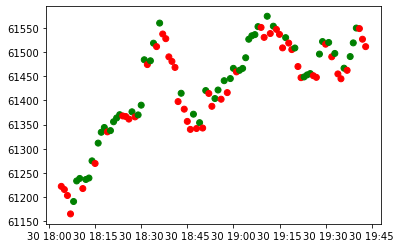

In [83]:
# plt.scatter(x=hist.index, y=hist["Open"], color=hist["Color"])
plt.scatter(x=hist.index[-100:], y=hist["Open_VET"][-100:], color=hist["Color_VET"][-100:])